In [1]:
import pandas as pd
df = pd.read_excel ('D:/ZION INTERNSHIP/advertising.xlsx')
print("DATA LOADED")
df.info()

DATA LOADED
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [2]:
print(df.head())
print(df.info())
print(df.isnull().sum())
print("DATA IS INSPECTED")
df.dropna(inplace=True)
print("MISSING VALUES HANDLED")

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
DATA IS INSPECTED
MISSING VALUES HANDLED


In [ ]:
print("Basic statistics")
print(df.describe())

Basic statistics
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


MAE: 0.92, MSE: 1.44, RMSE: 1.20, R² Score: 0.95


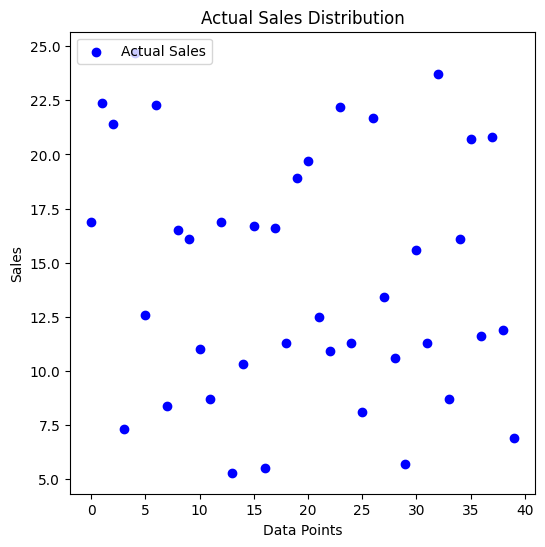

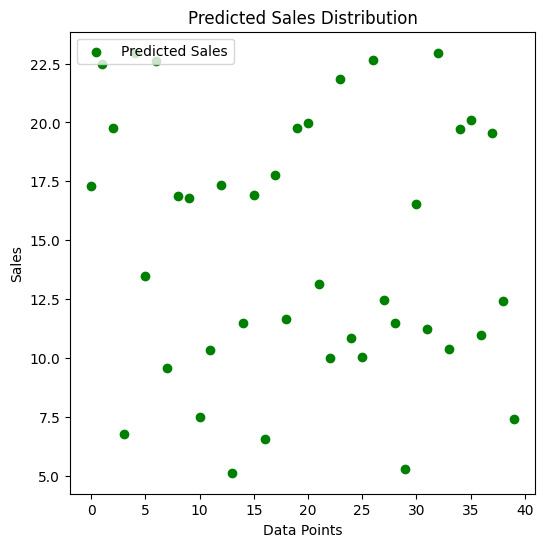

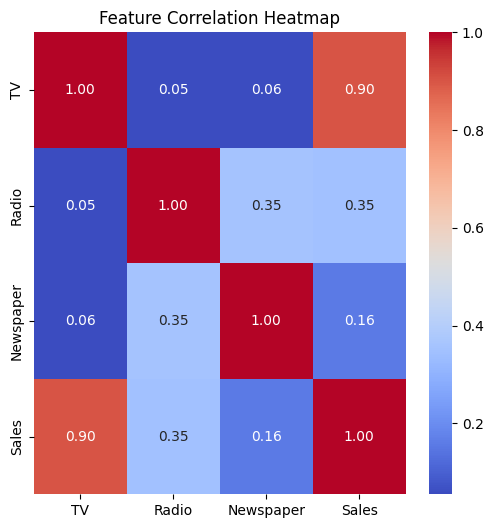

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the datase
# Splitting the data into features (X) and target variable (y)
X = df.drop(columns=["Sales"])
y = df["Sales"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)

# Evaluating model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print results
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R² Score: {r2:.2f}")

# Separate Graph for Actual Sales
plt.figure(figsize=(6,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Sales')
plt.xlabel("Data Points")
plt.ylabel("Sales")
plt.title("Actual Sales Distribution")
plt.legend(loc='upper left')
plt.show()
plt.close()

# Separate Graph for Predicted Sales
plt.figure(figsize=(6,6))
plt.scatter(range(len(y_pred)), y_pred, color='green', label='Predicted Sales')
plt.xlabel("Data Points")
plt.ylabel("Sales")
plt.title("Predicted Sales Distribution")
plt.legend(loc='upper left')
plt.show()
plt.close()

# Correlation Heatmap
plt.figure(figsize=(6,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()
plt.close()